In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
# !git clone https://github.com/Taeyoung96/Yolo-to-COCO-format-converter.git

In [2]:
!pwd

/home/office/kirilman/Projects/asbestos/src/notebooks/visualize_coco


In [58]:
yolo_dir = "../yolov5/runs/val/exp21/labels/"
image_dir = "../yolov5/open-pit-rock-chunks-test-3/valid/images/"

In [59]:
!cp {image_dir}* {'yolo_set/'} -a
!cp {yolo_dir}* {'yolo_set/'} -a

In [60]:
yolo_set = './yolo_set'
!python ./Yolo-to-COCO-format-converter/main.py -p {yolo_set}

Start!
Processing 0 ...
Finished!


In [3]:
def read_coco_datasets(list_images, list_anno, class_id=[0], verbose = True):
    json_dicts = dict()
    for i in range(len(list_anno)):
        if os.path.exists(list_anno[i]) and os.path.exists(list_images[i]): 

            dict_json =\
                  load_coco_json(json_file = list_anno[i], 
                                image_root = list_images[i], 
                                dataset_name = 'None',
                                extra_annotation_keys = None)
            if len(dict_json)>0:
                dict_json = corret_coco_json_path(dict_json, list_images[i])

                dict_json = check_class(dict_json,class_id)

                name_dataset = os.path.split(os.path.split(os.path.split(list_anno[i])[0])[0])[1]

                json_dicts[name_dataset]=dict_json

                if verbose:
                    print(i, len(dict_json))    
    return json_dicts

In [4]:
!pwd

/home/office/kirilman/Projects/asbestos/src/notebooks/visualize_coco


In [5]:
coco = COCO('./output/train_coco.json')

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


num of annotations with more than one polygan: 3903
BBox[0] (xyxy): [180.0, 785.5, 422.0, 956.5]
./yolo_set/637411996282308540_bmp.rf.50800da4687bda91b13f65c7f15fcead.jpg
(1280, 1280, 3)


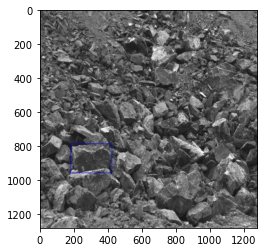

In [19]:
coco_dataset_path = './yolo_set'
ann_ids = coco.getAnnIds(iscrowd=False)
anns = coco.loadAnns(ann_ids)
anns = [ann for ann in anns if len(ann['bbox']) > 1]
print("num of annotations with more than one polygan:", len(anns))    # 3522

for i, ann in enumerate(anns):
    image_id = ann["image_id"]
    segs = ann["segmentation"]
    bbox = np.array(ann["bbox"])
    bbox[2:4] = bbox[0:2] + bbox[2:4]
    print("BBox[{}] (xyxy):".format(i), bbox.tolist())
    
    image_info = coco.loadImgs(image_id)
    image_path = image_info[0]["file_name"]
    # [0] is required, always return a list
    image_path = os.path.join(coco_dataset_path, image_path)
    print(image_path)
    # /export/public/MS-COCO-2017/val2017/000000061108.jpg

    image = cv2.imread(image_path)
    print(image.shape)
    segs = [np.array(seg, np.int32).reshape((1, -1, 2))
            for seg in segs]
    
    for seg in segs: cv2.drawContours(image, seg, -1, (0,255,0), 2)
    # third aug -1 means draw all contours in 3-D array, Or
    # for seg in segs: cv2.fillPoly(image, segm, (0,255,0))
    cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), 
                  (int(bbox[2]), int(bbox[3])), (0,0,255), 2)



    break

In [20]:
anns

[{'id': 1,
  'image_id': 0,
  'bbox': [180.0, 785.5, 242.0, 171.0],
  'area': 41382,
  'iscrowd': 0,
  'category_id': 1,
  'segmentation': []},
 {'id': 2,
  'image_id': 0,
  'bbox': [938.5, 305.0, 223.0, 170.0],
  'area': 37910,
  'iscrowd': 0,
  'category_id': 1,
  'segmentation': []},
 {'id': 3,
  'image_id': 0,
  'bbox': [754.5, 736.0, 215.0, 172.0],
  'area': 36980,
  'iscrowd': 0,
  'category_id': 1,
  'segmentation': []},
 {'id': 4,
  'image_id': 0,
  'bbox': [678.5, 954.0, 225.0, 266.0],
  'area': 59850,
  'iscrowd': 0,
  'category_id': 1,
  'segmentation': []},
 {'id': 5,
  'image_id': 0,
  'bbox': [856.5, 1125.0, 149.0, 142.0],
  'area': 21158,
  'iscrowd': 0,
  'category_id': 1,
  'segmentation': []},
 {'id': 6,
  'image_id': 0,
  'bbox': [153.0, 1028.0, 182.0, 154.0],
  'area': 28028,
  'iscrowd': 0,
  'category_id': 1,
  'segmentation': []},
 {'id': 7,
  'image_id': 0,
  'bbox': [652.5, 200.5, 151.0, 137.0],
  'area': 20687,
  'iscrowd': 0,
  'category_id': 1,
  'segmentati

In [12]:
image